In [1]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import sys
import cv2
import tensorflow as tf
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-m", "--model", required=True,
#	help="path to trained human activity recognition model")
#ap.add_argument("-c", "--classes", required=True,
#	help="path to class labels file")
#ap.add_argument("-i", "--input", type=str, default="",
#	help="optional path to video file")
#args = vars(ap.parse_args())

In [2]:
# load the contents of the class labels file, then define the sample
# duration (i.e., # of frames for classification) and sample size
# (i.e., the spatial dimensions of the frame)
CLASSES = open("/content/drive/My Drive/human-activity-recognition/action_recognition_kinetics.txt").read().strip().split("\n")
SAMPLE_DURATION = 16
SAMPLE_SIZE = 112

In [3]:
# load the human activity recognition model
print("[INFO] loading human activity recognition model...")
net = cv2.dnn.readNet("/content/drive/My Drive/human-activity-recognition/resnet-34_kinetics.onnx")
# grab a pointer to the input video stream
print("[INFO] accessing video stream...")
vs = cv2.VideoCapture("/content/drive/My Drive/human-activity-recognition/example_activities.mp4")

[INFO] loading human activity recognition model...
[INFO] accessing video stream...


In [4]:
from collections import deque
frames = deque()
new_frames=deque()

In [5]:
with tf.device(tf.test.gpu_device_name()):
	# loop over frames from the video stream
	while True:
		# read a frame from the video stream
		(grabbed, frame) = vs.read()
		# if the frame was not grabbed then we've reached the end of
		# the video stream so break from the loop
		if not grabbed:
			print("[INFO] no frame read from stream - exiting")
			break
		# resize the frame (to ensure faster processing) and add the
		# frame to our queue
		frame = imutils.resize(frame, width=400)
		frames.append(frame)
		# if our queue is not filled to the sample size, continue back to
		# the top of the loop and continue polling/processing frames
		if len(frames) < SAMPLE_DURATION:
			continue



[INFO] no frame read from stream - exiting


In [6]:
print(len(frames))

1799


In [7]:
width = int(vs.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vs.get(cv2.CAP_PROP_FRAME_HEIGHT))
length = int(vs.get(cv2.CAP_PROP_FRAME_COUNT))
print(width)
print(height)
print(length)

1280
720
1799


In [8]:
# Find OpenCV version
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

if int(major_ver)  < 3 :
    fps = vs.get(cv2.cv.CV_CAP_PROP_FPS)
    print("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
else :
    fps = vs.get(cv2.CAP_PROP_FPS)
    print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))

vs.release();

Frames per second using video.get(cv2.CAP_PROP_FPS) : 30.0


In [9]:
# now that our frames array is filled we can construct our blob
def make_video(frames):
  blob = cv2.dnn.blobFromImages(frames, 1.0,
	(SAMPLE_SIZE, SAMPLE_SIZE), (114.7748, 107.7354, 99.4750),
	swapRB=True, crop=True)
  blob = np.transpose(blob, (1, 0, 2, 3))
  blob = np.expand_dims(blob, axis=0)
# pass the blob through the network to obtain our human activity
# recognition predictions
  net.setInput(blob)
  outputs = net.forward()
  label = CLASSES[np.argmax(outputs)]
  for frame in frames:

  # draw the predicted activity on the frame
    cv2.rectangle(frame, (0, 0), (300, 40), (0, 0, 0), -1)
    cv2.putText(frame, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
	  0.8, (255, 255, 255), 2)
    new_frames.append(frame)

In [10]:
with tf.device(tf.test.gpu_device_name()):
  i=1
  while i<=length:
    fr=deque(maxlen=16)
    for frame in frames:
      fr.append(frame);
      if i % 16 == 0:
        make_video(fr);
        fr.clear();
      i=i+1;
      print(i)
  
  if fr:
    make_video(fr)




  
  


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [11]:
print(len(new_frames))

1799


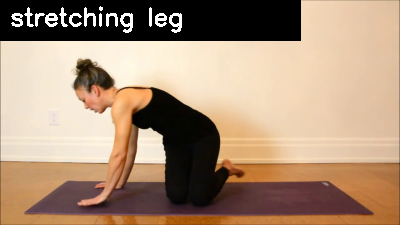

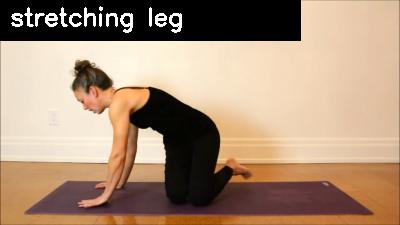

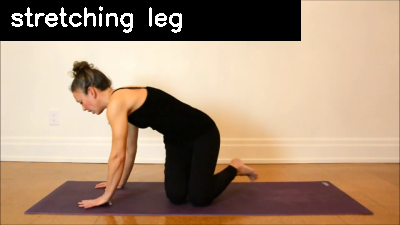

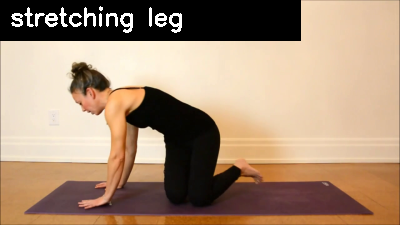

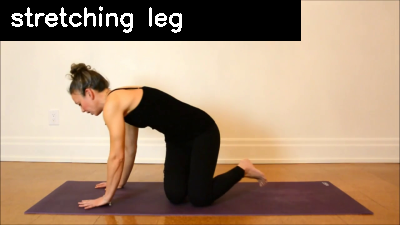

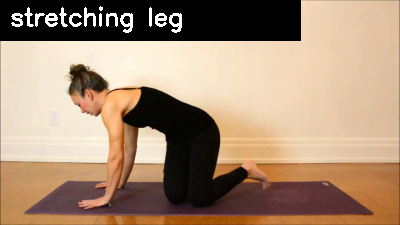

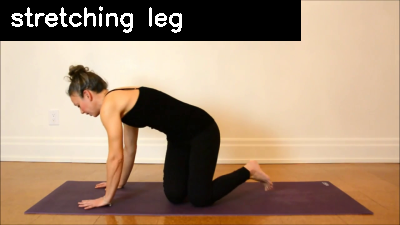

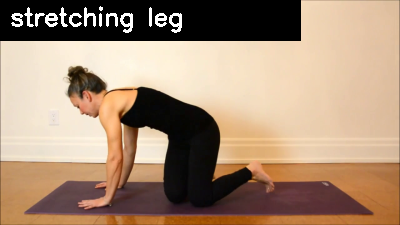

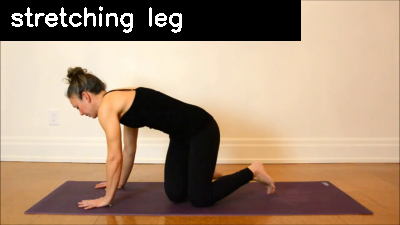

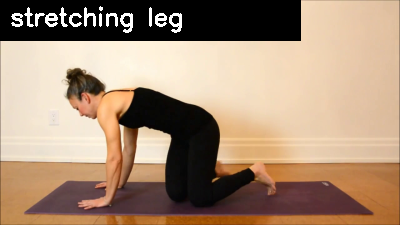

In [13]:
from google.colab.patches import cv2_imshow
ak=0
for frame in frames:
  ak=ak+1
  cv2_imshow(frame)
  if ak == 10:
    break

In [14]:
def m_video(outvid, frames=None, fps=30, size=None,
               is_color=True, format="FMP4"):
  from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
  fourcc = VideoWriter_fourcc(*format)
  vid = None
  for frame in frames:
      if vid is None:
          if size is None:
              size = frame.shape[1], frame.shape[0]
          vid = VideoWriter(outvid, fourcc, float(fps), size, is_color)
      if size[0] != frame.shape[1] and size[1] != frame.shape[0]:
          frame = resize(frame, size)
      vid.write(frame)
  vid.release()

In [15]:
m_video("/content/drive/My Drive/human-activity-recognition/output.mp4", new_frames, fps=30)